In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import sklearn
print(sklearn.__version__)

1.3.1


In [64]:

# Load the CSV file
data = pd.read_csv('drag_traj2.csv')

# Extract the matrix of data
matrix = data.values

data.head()

# Pivot the DataFrame
data = data.melt(id_vars=['vel'], var_name='drag', value_name='x').astype('float64').dropna(axis= 0, how='any')

# Sort the DataFrame by 'foo' column
data.sort_values(['vel','drag'], ignore_index=True, inplace=True)

#pivoted_df = pivoted_df.dropna(subset=['c_l'])

# Display the pivoted DataFrame
print(data)
data.dtypes

,vel,20,25,35,45
0,4426.17900,288.75236,206.52173,148.86576,61.90925
1,4533.30611,301.03968,221.64459,166.35160,78.44989
2,4637.13702,313.32701,238.65781,184.30999,94.04535
3,4744.26413,325.61433,254.25329,202.26841,110.58599
4,4849.74316,338.84686,271.26651,220.22684,126.65405


           vel  drag          x
0   4426.17900  20.0  288.75236
1   4426.17900  25.0  206.52173
2   4426.17900  35.0  148.86576
3   4426.17900  45.0   61.90925
4   4533.30611  20.0  301.03968
5   4533.30611  25.0  221.64459
6   4533.30611  35.0  166.35160
7   4533.30611  45.0   78.44989
8   4637.13702  20.0  313.32701
9   4637.13702  25.0  238.65781
10  4637.13702  35.0  184.30999
11  4637.13702  45.0   94.04535
12  4744.26413  20.0  325.61433
13  4744.26413  25.0  254.25329
14  4744.26413  35.0  202.26841
15  4744.26413  45.0  110.58599
16  4849.74316  20.0  338.84686
17  4849.74316  25.0  271.26651
18  4849.74316  35.0  220.22684
19  4849.74316  45.0  126.65405
20  4955.22213  20.0  351.13419
21  4955.22213  25.0  287.80715
22  4955.22213  35.0  238.18523
23  4955.22213  45.0  142.72211
24  5059.05301  20.0  363.89410
25  5059.05301  25.0  303.87521
26  5059.05301  35.0  255.67107
27  5059.05301  45.0  158.79017
28  5166.18018  20.0  376.18146
29  5166.18018  25.0  319.94327
30  5166

vel     float64
drag    float64
x       float64
dtype: object

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

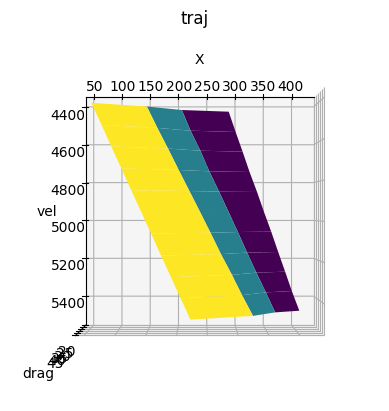

In [65]:
# Reshape the DataFrame into a pivot table
pivot_table = data.pivot(index='vel', columns='drag', values='x')

# Convert the data to a 2D numpy array
X = pivot_table.values


# Create the X and Y coordinate grids
D, V = np.meshgrid(pivot_table.columns, pivot_table.index)


# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

LinearRegression()

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

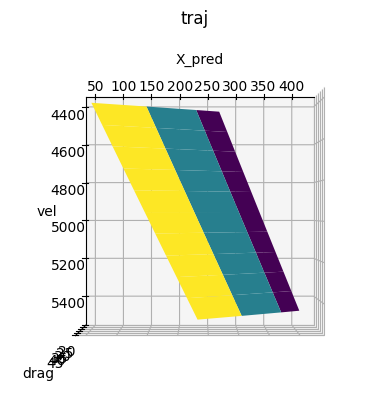

In [66]:
# Flatten the X, Y, and Z arrays
X_flat = X.flatten()
V_flat = V.flatten()
D_flat = D.flatten()


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, interaction_only=False)
VD_poly = poly_features.fit_transform(np.column_stack((V_flat, D_flat)))

# Perform polynomial regression
model = LinearRegression()
model.fit(VD_poly, X_flat)

# Generate predictions for the grid points
X_pred = model.predict(VD_poly)

# Reshape the predicted values back to a 2D array
X_pred = X_pred.reshape(X.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

In [67]:
# Retrieve the coefficients from the trained model
coef = model.coef_
intercept = model.intercept_

# Define the equation for the prediction
equation = f"x = {intercept}"

for i, c in enumerate(coef[1:], start=1):
    power = poly_features.powers_[i]
    equation += f" + {c} * vel^{power[0]} * drag^{power[1]}"

print("Equation for the model prediction:")
print(equation)
print("Equation in python form:")
print(equation.replace('^','**'))

Equation for the model prediction:
x = -38.0268152009462 + 0.09906578419425373 * vel^1 * drag^0 + -12.707084859116666 * vel^0 * drag^1 + 1.3305326295037778e-06 * vel^2 * drag^0 + 0.0011766877774739082 * vel^1 * drag^1 + -0.014838331795402771 * vel^0 * drag^2
Equation in python form:
x = -38.0268152009462 + 0.09906578419425373 * vel**1 * drag**0 + -12.707084859116666 * vel**0 * drag**1 + 1.3305326295037778e-06 * vel**2 * drag**0 + 0.0011766877774739082 * vel**1 * drag**1 + -0.014838331795402771 * vel**0 * drag**2


In [51]:
def trajplot_x_vd(vel, drag):
    x = -531.1596833649385 + 0.2369508010818678 * vel**1 * drag**0 + -0.7771572651359938 * vel**0 * drag**1 + -2.1586890749936138e-07 * vel**2 * drag**0 + 0.00021100580946806138 * vel**1 * drag**1 + -0.1132059499998106 * vel**0 * drag**2
    
    return x

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

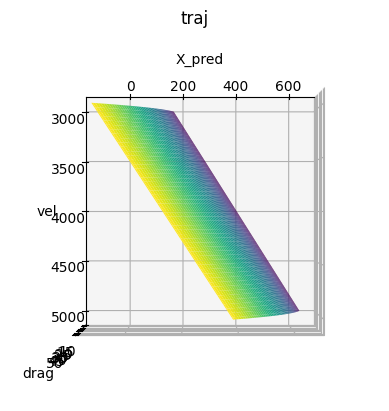

In [52]:
# Generate predictions for the grid points
V_ext = np.linspace(3000, 5000, 100)
D_ext = np.linspace(10, 50, 100)
V_ext, D_ext = np.meshgrid(V_ext, D_ext)
X_pred_ext = trajplot_x_vd(V_ext, D_ext)

# Reshape the predicted values back to a 2D array
X_pred_ext = X_pred_ext.reshape(V_ext.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred_ext, V_ext, D_ext, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()